In [35]:
import numpy as np
import os
import pandas as pd
from Bio import SeqIO
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
from Bio.SeqUtils import GC
plt.style.use('ggplot')
import importlib
import Module.cnv as cnv
importlib.reload(cnv)
from scipy.interpolate import interp1d
import statsmodels.api as sm

In [4]:
mixed_counts_df = pd.read_csv('/home/sedra/Intership/mm_liver_met.csv')
bin_df = pd.read_csv(r'/home/sedra/Intership/cnv/Module/mm10_1Mb_bins.txt', sep = '\s+')
cancer_counts_df = pd.read_csv(r'/home/sedra/Intership/cnv/Module/cancer.csv')
normal_counts_df = pd.read_csv('/home/sedra/Intership/cnv/Module/normal.csv')

In [27]:
indices = cnv.index_of_chr(bin_df, "chr_ind", "bin_start")

In [3]:
chr1 = (SeqIO.read("chr1.fna", "fasta")).seq
chr2 = (SeqIO.read("chr2.fna", "fasta")).seq
chr3 = (SeqIO.read("chr3.fna", "fasta")).seq
chr4 = (SeqIO.read("chr4.fna", "fasta")).seq
chr5 = (SeqIO.read("chr5.fna", "fasta")).seq
chr6 = (SeqIO.read("chr6.fna", "fasta")).seq
chr7 = (SeqIO.read("chr7.fna", "fasta")).seq
chr8 = (SeqIO.read("chr8.fna", "fasta")).seq
chr9 = (SeqIO.read("chr9.fna", "fasta")).seq
chr10 = (SeqIO.read("chr10.fna", "fasta")).seq
chr11 = (SeqIO.read("chr11.fna", "fasta")).seq
chr12 = (SeqIO.read("chr12.fna", "fasta")).seq
chr13 = (SeqIO.read("chr13.fna", "fasta")).seq
chr14 = (SeqIO.read("chr14.fna", "fasta")).seq
chr15 = (SeqIO.read("chr15.fna", "fasta")).seq
chr16 = (SeqIO.read("chr16.fna", "fasta")).seq
chr17 = (SeqIO.read("chr17.fna", "fasta")).seq
chr18 = (SeqIO.read("chr18.fna", "fasta")).seq
chr19 = (SeqIO.read("chr19.fna", "fasta")).seq
chrX = (SeqIO.read("chrX.fna", "fasta")).seq
chrY = (SeqIO.read("chrY.fna", "fasta")).seq
chrM = (SeqIO.read("chrMT.fna", "fasta")).seq


In [8]:
chr_seq_list = [chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,
                chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chrX,chrY,chrM]

In [8]:
gc_content = cnv.countCGall(chr_seq_list,indices,bin_df,22)

In [10]:
cg_content1 = cnv.countCGall1(chr_list,indices,bin_df,22)

In [10]:
bin_df['GC_content'] = gc_content 
bin_df['GC_content1'] = cg_content1 
#bin_df_with_gc = bin_df

In [13]:
#bin_df_with_gc.to_csv(r'/home/sedra/Intership/cnv/bin_df_with_gc.csv',index = False)

In [7]:
bin_df_with_gc = pd.read_csv('/home/sedra/Intership/cnv/bin_df_with_gc.csv')

In [8]:
copy_df = pd.merge(bin_df_with_gc, mixed_counts_df, on = 'bin_ind', how = 'inner')
copy_df = pd.merge(copy_df, normal_counts_df, on = 'bin_ind', how = 'inner')
copy_df = copy_df.rename({'0': 'normal_counts'}, axis = 1)
copy_df = pd.merge(copy_df, cancer_counts_df, on = 'bin_ind', how = 'inner')
copy_df = copy_df.rename({'0': 'cancer_counts'}, axis = 1)
copy_df = copy_df.rename({'counts': 'mixed_counts'}, axis = 1)
copy_df['cancer/normal'] = copy_df['cancer_counts']/copy_df['normal_counts']

In [34]:
#copy_df

In [13]:
copy_df = copy_df.drop(copy_df[copy_df.GC_content == 0].index)
copy_df = copy_df.drop(copy_df[copy_df.mixed_counts > 10000].index)
copy_df = copy_df.reset_index(drop=True)

In [15]:
chr_seq_list = [chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,
                chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19]
indices = cnv.index_of_chr(copy_df, "chr_ind", "bin_start")
gc_content = cnv.countCGall(chr_seq_list,indices,copy_df,19)
copy_df["GC_content"] = gc_content

In [566]:
#print(plt.rcParams)

In [41]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
          'figure.titlesize': 30,
          "figure.autolayout": True,
         'axes.labelsize':17,
         'axes.titlesize':30,
         'xtick.labelsize':17,
         'ytick.labelsize':17,
         'scatter.marker': '.',
         'scatter.edgecolors': 'black'}
plt.rcParams.update(params)

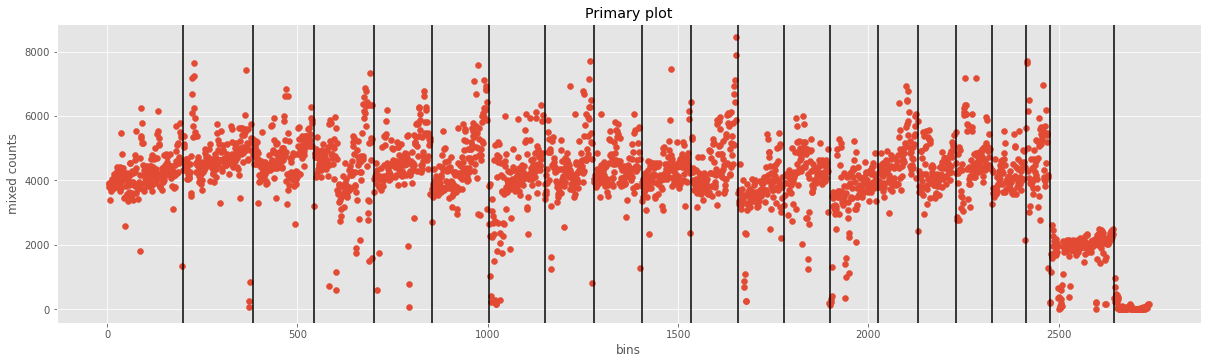

In [12]:
primary_plot = plt.scatter(copy_df['bin_ind'], copy_df['mixed_counts'])
indices = cnv.index_of_chr(copy_df, "chr_ind", "bin_start")
del indices[-1:]
for i in indices:
    plt.axvline(x=copy_df.bin_ind[i], ymin=0, ymax=1, c='black')
plt.title('Primary plot')
plt.rcParams["figure.figsize"] = [20.50, 5.50]
plt.xlabel('bins')
plt.ylabel('mixed counts')
plt.show()

In [73]:
cnv.add_column(copy_df,"mean_normalised_normal_counts")
cnv.add_column(copy_df,"median_normalised_normal_counts")
cnv.add_column(copy_df,"mode_normalised_normal_counts")
cnv.add_column(copy_df,"mean_normalised_mixed_counts")
cnv.add_column(copy_df,"median_normalised_mixed_counts")
cnv.add_column(copy_df,"mode_normalised_mixed_counts")
cnv.add_column(copy_df,"mean_normalised_cancer_counts")
cnv.add_column(copy_df,"median_normalised_cancer_counts")
cnv.add_column(copy_df,"mode_normalised_cancer_counts")

In [20]:
cnv.normalise_to_fixed_value(copy_df,copy_df['normal_counts'] ,"mean","_normal") 
cnv.normalise_to_fixed_value(copy_df,copy_df['normal_counts'] ,"median","_normal")  
cnv.normalise_to_fixed_value(copy_df,copy_df['normal_counts'] ,"mode","_normal") 
cnv.normalise_to_fixed_value(copy_df,copy_df['mixed_counts'] ,"mean","_mixed") 
cnv.normalise_to_fixed_value(copy_df,copy_df['mixed_counts'] ,"median","_mixed")  
cnv.normalise_to_fixed_value(copy_df,copy_df['mixed_counts'] ,"mode","_mixed")
cnv.normalise_to_fixed_value(copy_df,copy_df['cancer_counts'] ,"mean","_cancer") 
cnv.normalise_to_fixed_value(copy_df,copy_df['cancer_counts'] ,"median","_cancer")  
cnv.normalise_to_fixed_value(copy_df,copy_df['cancer_counts'] ,"mode","_cancer")

[]

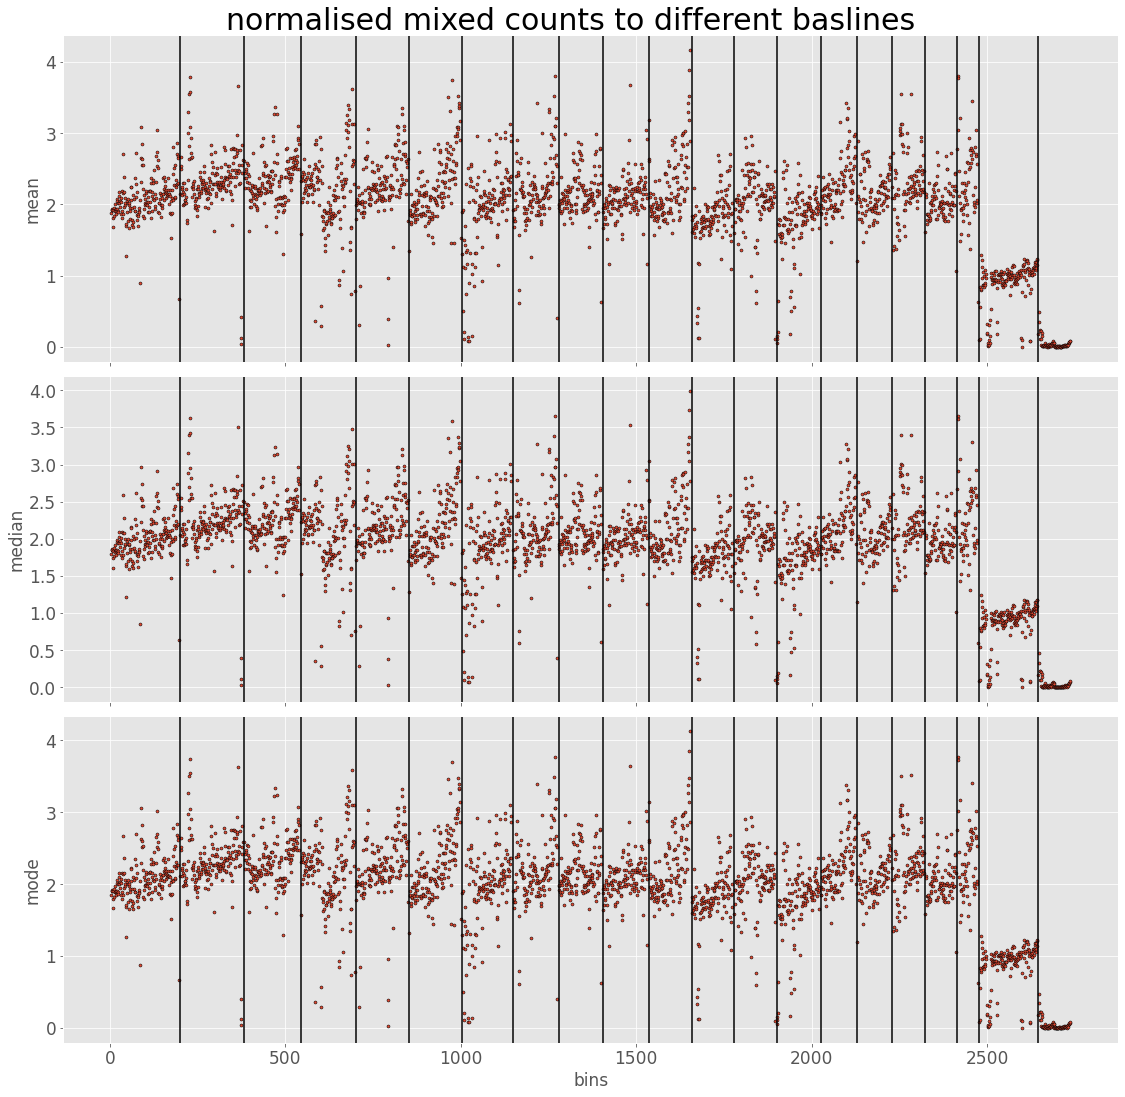

In [541]:
fig0, axs0 = plt.subplots(3,sharex=True)
fig0.suptitle('normalised mixed counts to different baslines')
axs0[0].scatter(copy_df['bin_ind'], copy_df['mean_normalised_mixed_counts'])
axs0[1].scatter(copy_df['bin_ind'], copy_df['median_normalised_mixed_counts'])
axs0[2].scatter(copy_df['bin_ind'], copy_df['mode_normalised_mixed_counts'])
axs0[0].set(ylabel = 'mean')
axs0[1].set(ylabel ='median')
axs0[2].set(xlabel='bins',ylabel='mode')
indices = cnv.index_of_chr(copy_df, "chr_ind", "bin_start")
del indices[-1:]
for j in range(3):
    for i in indices:
        axs0[j].axvline(x=copy_df.bin_ind[i], ymin=0, ymax=1,c='black')
plt.rcParams["figure.figsize"] = [15.50, 15.50]

plt.plot()


In [11]:
copy_df = copy_df.drop(copy_df[copy_df.chr_ind== 20].index)
copy_df = copy_df.drop(copy_df[copy_df.chr_ind == 21].index)
copy_df = copy_df.reset_index(drop=True)

[]

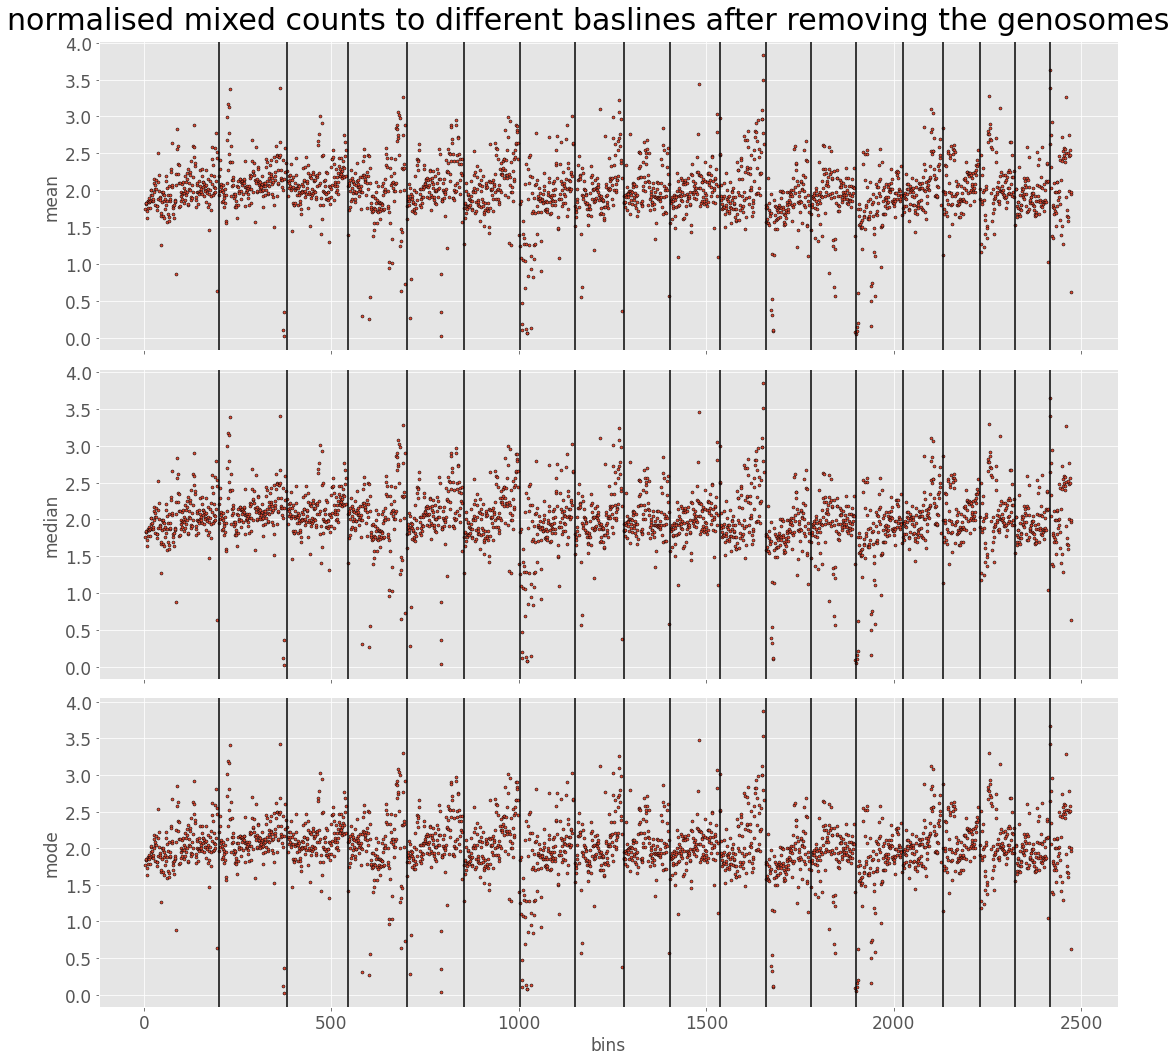

In [21]:
fig01, axs01 = plt.subplots(3,sharex=True)
fig01.suptitle('normalised mixed counts to different baslines after removing the genosomes')
axs01[0].scatter(copy_df['bin_ind'],copy_df['mean_normalised_normal_counts'])
axs01[1].scatter(copy_df['bin_ind'],copy_df['median_normalised_normal_counts'])
axs01[2].scatter(copy_df['bin_ind'],copy_df['mode_normalised_normal_counts'])
indices = cnv.index_of_chr(copy_df,"chr_ind","bin_start")
del indices[-1:]
for j in range(3):
    for i in indices:
        axs01[j].axvline(x=copy_df.bin_ind[i],ymin=0,ymax=1,c='black')
axs01[0].set(ylabel='mean')
axs01[1].set( ylabel='median')
axs01[2].set(xlabel='bins',ylabel ='mode')

plt.plot()

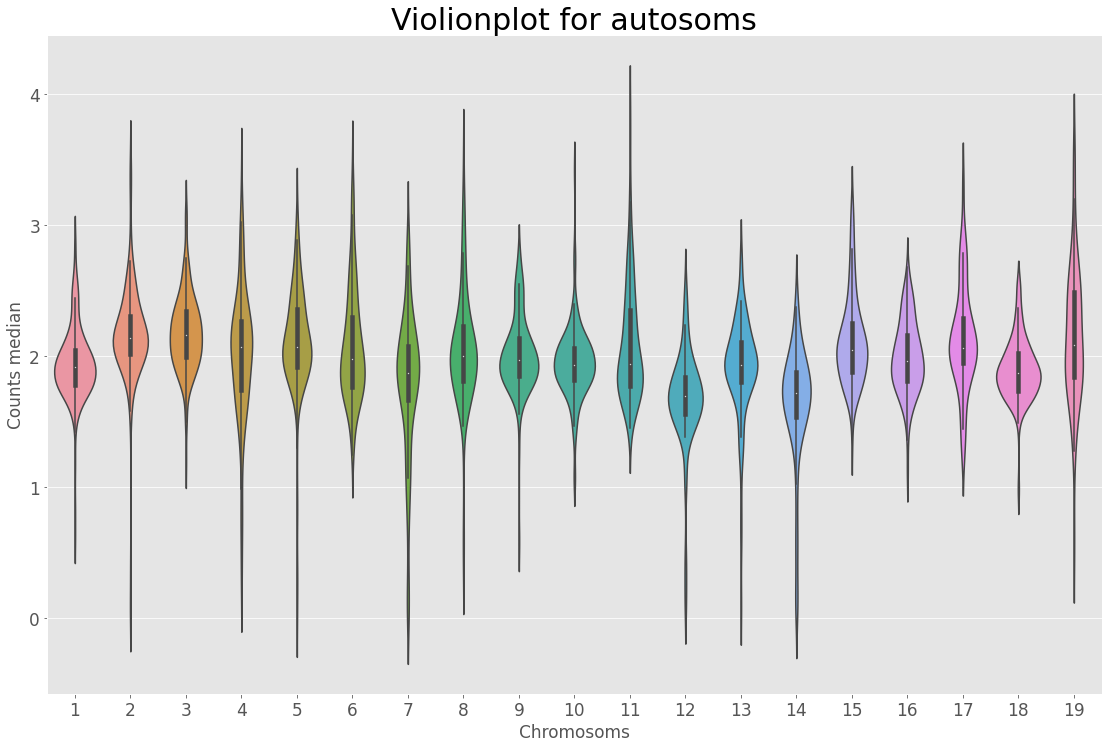

In [163]:
fig02 = sns.violinplot(x = copy_df.chr_ind , y = copy_df.mean_normalised_mixed_counts)
fig02.set_title('Violionplot for autosoms')
plt.xlabel("Chromosoms")
plt.ylabel("Counts median")
plt.show()

[]

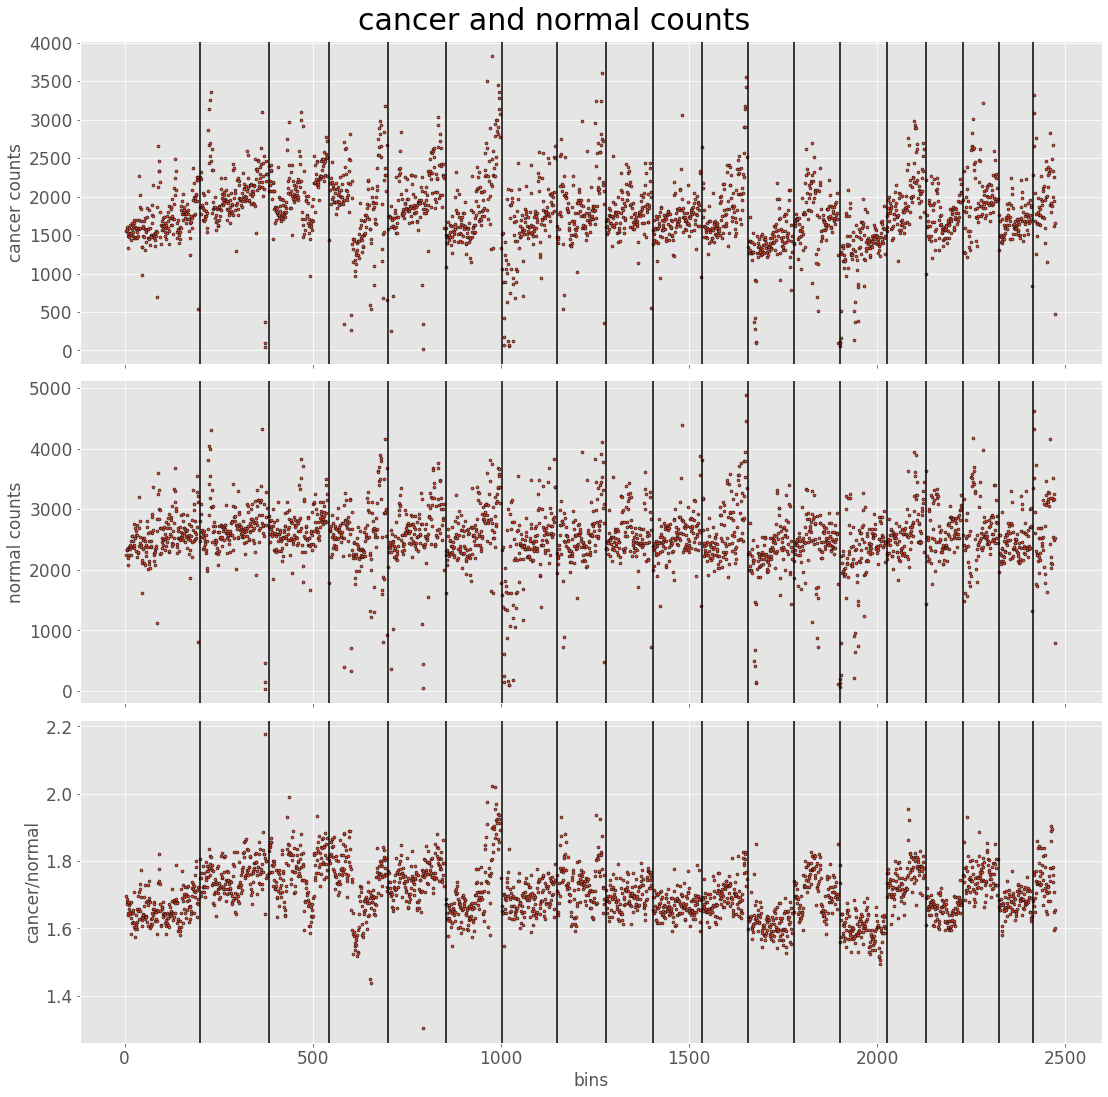

In [545]:
fig03,axs03=plt.subplots(3,sharex=True)
fig03.suptitle('cancer and normal counts')
axs03[0].scatter(copy_df['bin_ind'],copy_df['cancer_counts'])
axs03[1].scatter(copy_df['bin_ind'],copy_df['normal_counts'])
axs03[2].scatter(copy_df['bin_ind'],copy_df['cancer/normal'])
axs03[0].set( ylabel='cancer counts')
axs03[1].set( ylabel='normal counts')
axs03[2].set(xlabel='bins',ylabel='cancer/normal')
indices = cnv.index_of_chr(copy_df,"chr_ind","bin_start")
del indices[-1:]
for j in range(3):
    for i in indices:
        axs03[j].axvline(x=copy_df.bin_ind[i],ymin=0,ymax=1,c='black')
plt.plot()

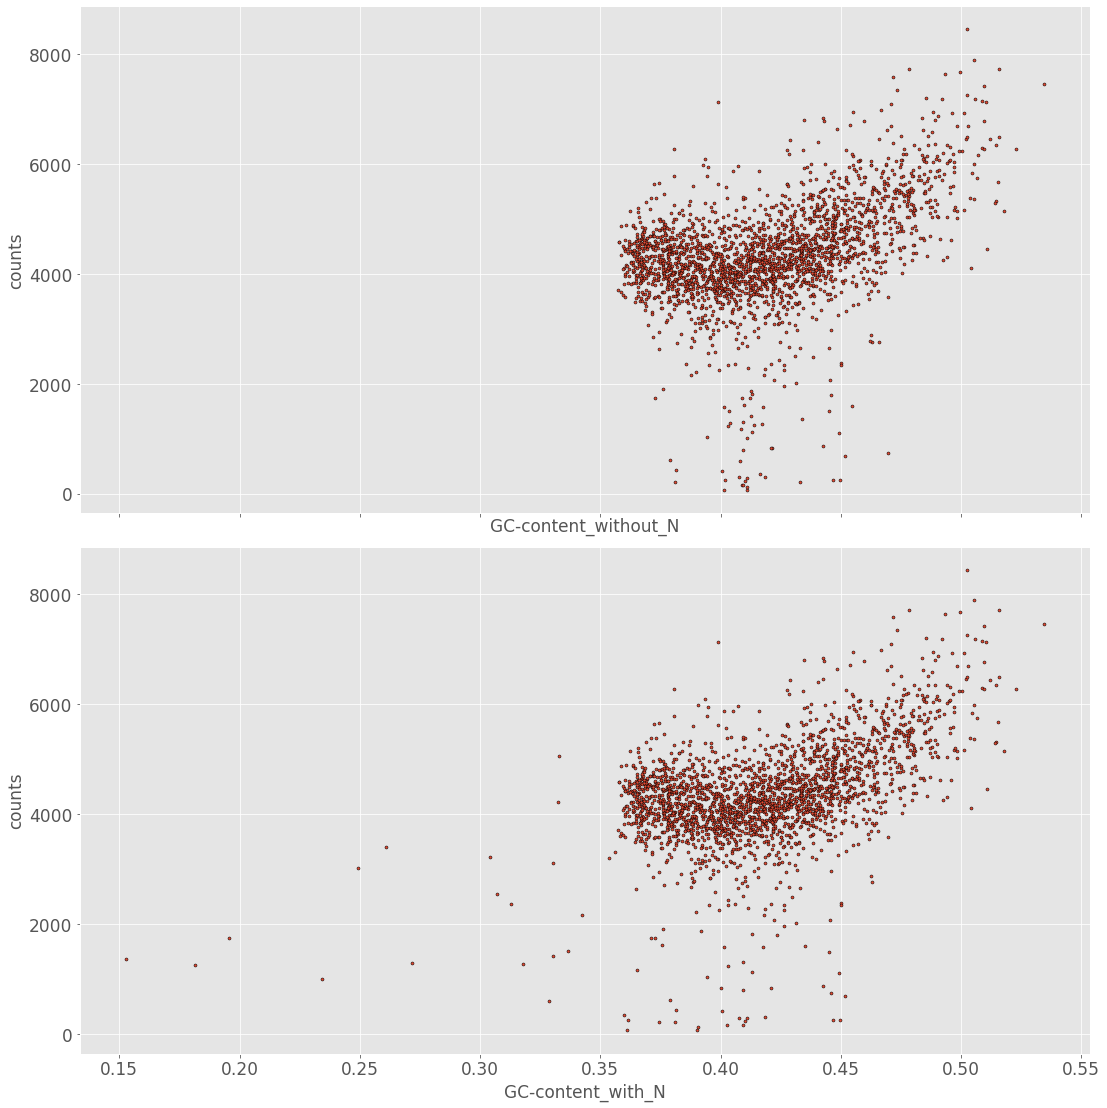

In [546]:
fig04,axs04 = plt.subplots(2,sharex=True)
fig03.suptitle('GC-contetn in mixed counts')
axs04[0].scatter(copy_df['GC_content'],copy_df['mixed_counts'])
axs04[1].scatter(copy_df['GC_content1']/100,copy_df['mixed_counts'])
axs04[0].set(xlabel='GC-content_without_N',ylabel='counts')
axs04[1].set(xlabel='GC-content_with_N',ylabel='counts')
plt.show()

In [12]:
copy_df = copy_df.drop('GC_content1',axis=1)
copy_df = copy_df.reset_index(drop=True)

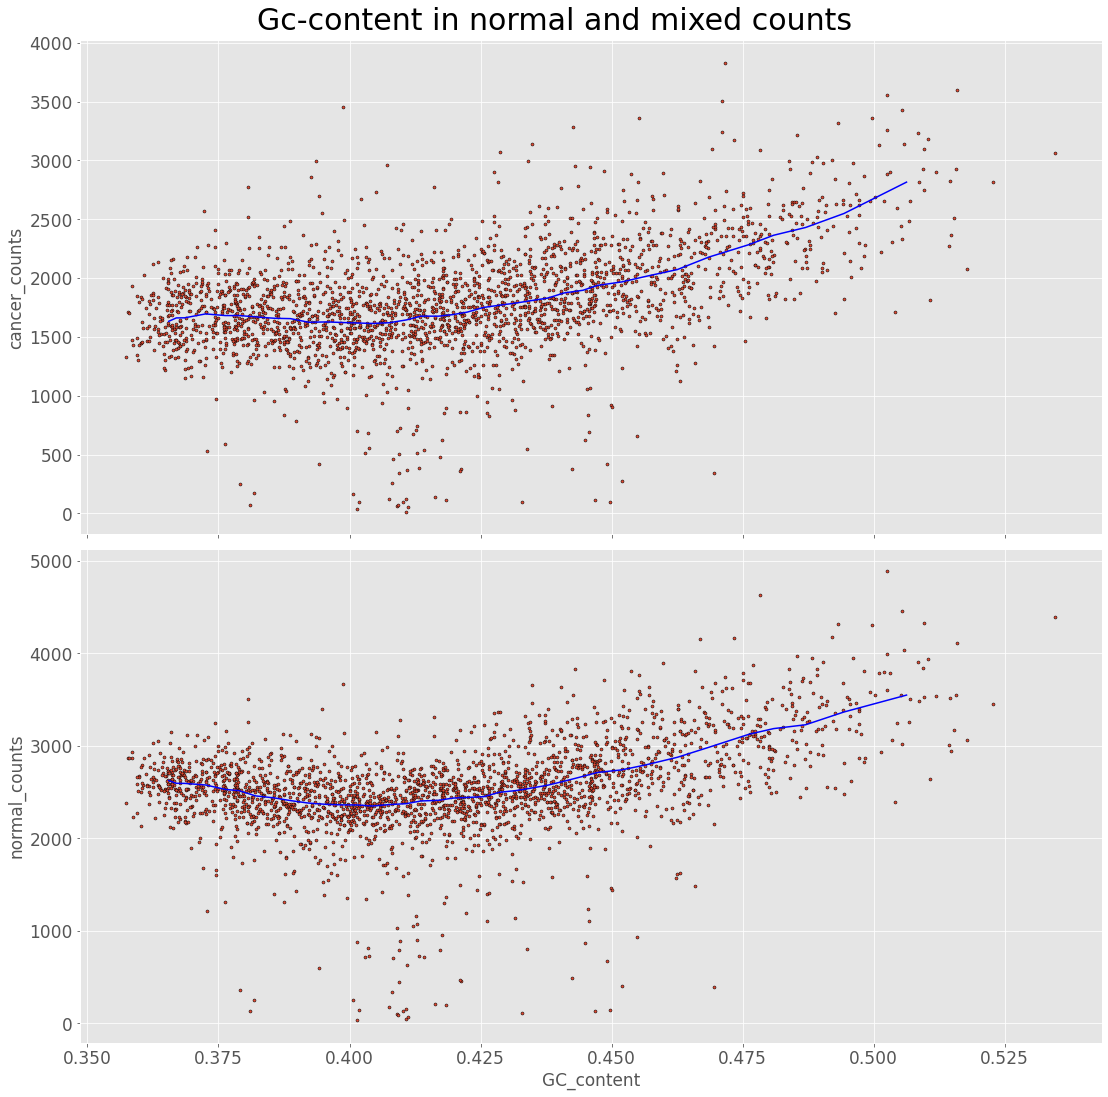

In [548]:
# for the smoothines:
cancer_counts = []
cg_cancer = []
s = copy_df.sort_values("GC_content",ignore_index=True)
for i in range (0,2600,70):
    cancer_counts.append(s.loc[(i-150):(i+150)].cancer_counts.median())
    cg_cancer.append(s.loc[(i-150):(i+150)].GC_content.median())
    
normal_counts = []
cg_normal = []
for i in range (0,2600,70):
    normal_counts.append(s.loc[(i-150):(i+150)].normal_counts.median())
    cg_normal.append(s.loc[(i-150):(i+150)].GC_content.median())
    
fig05,axs05=plt.subplots(2,sharex=True)
fig05.suptitle('Gc-content in normal and mixed counts')
axs05[0].scatter(copy_df['GC_content'],copy_df['cancer_counts'])
axs05[0].plot(cg_cancer, cancer_counts,color="b")
axs05[1].scatter(copy_df['GC_content'],copy_df['normal_counts'])
axs05[1].plot(cg_normal,normal_counts,color="b")
axs05[0].set(ylabel='cancer_counts')
axs05[1].set(xlabel='GC_content',ylabel='normal_counts')

plt.show()

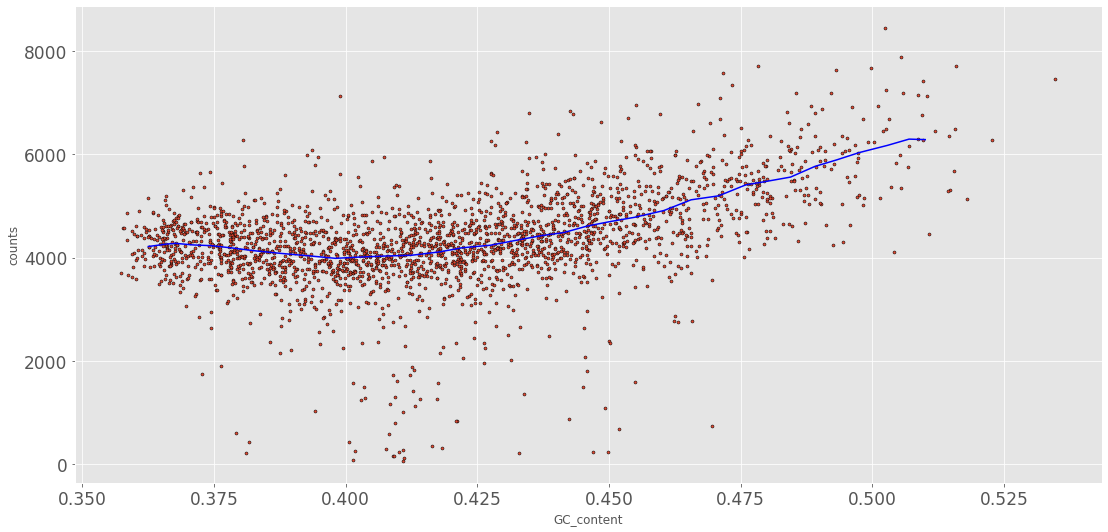

In [326]:
median_counts = []
cg_window = []
for i in range (3500,5200,50):
    median_counts.append(copy_df.loc[(copy_df.GC_content >= (i/10000)-0.01) &
                                     (copy_df.GC_content <= (i/10000)+0.015)].mixed_counts.median())
    cg_window.append(copy_df.loc[(copy_df.GC_content >= (i/10000)-0.01) &
                                     (copy_df.GC_content <= (i/10000)+0.015)].GC_content.median())
    
fig06=plt.scatter(copy_df['GC_content'],copy_df['mixed_counts'])
plt.plot(cg_window,median_counts,color="b")
plt.xlabel('GC_content')
plt.ylabel('counts')
plt.rcParams["figure.figsize"] = [15.5,7.5]
plt.show()

In [16]:
copy_df

,chr,bin_start,bin_end,bin_len,chr_ind,bin_ind,GC_content,mixed_counts,normal_counts,cancer_counts,cancer/normal,gc_normalised_normal_counts,gc_normlised_cancer_counts
0,chr1,3000000,4000000,1000000,1,4,0.386435,3797,2239,1558,0.695846,2332.143131,1697.011410
1,chr1,4000000,5000000,1000000,1,5,0.399599,3898,2322,1576,0.678725,2506.070558,1749.893415
2,chr1,5000000,6000000,1000000,1,6,0.395048,3925,2326,1599,0.687446,2508.265596,1778.714982
3,chr1,6000000,7000000,1000000,1,7,0.394995,3905,2336,1569,0.671661,2516.921622,1744.267837
4,chr1,7000000,8000000,1000000,1,8,0.392176,3401,2074,1327,0.639826,2220.563827,1466.200919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,chr19,57000000,58000000,1000000,19,2469,0.440432,5419,3170,2249,0.709464,3113.140108,2187.531375
2404,chr19,58000000,59000000,1000000,19,2470,0.450388,5190,3252,1938,0.595941,3043.151586,1791.359324
2405,chr19,59000000,60000000,1000000,19,2471,0.436703,4101,2485,1616,0.650302,2478.588350,1598.546491
2406,chr19,60000000,61000000,1000000,19,2472,0.417897,4181,2528,1653,0.653877,2675.213273,1767.935922


In [31]:
copy_df

,chr,bin_start,bin_end,bin_len,chr_ind,bin_ind,GC_content,mixed_counts,normal_counts,cancer_counts,cancer/normal,gc_normalised_normal_counts,gc_normlised_cancer_counts
0,chr1,3000000,4000000,1000000,1,4,0.386435,3797,2239,1558,0.695846,2340.264072,1697.011410
1,chr1,4000000,5000000,1000000,1,5,0.399599,3898,2322,1576,0.678725,2506.070558,1749.893415
2,chr1,5000000,6000000,1000000,1,6,0.395048,3925,2326,1599,0.687446,2508.265596,1778.714982
3,chr1,6000000,7000000,1000000,1,7,0.394995,3905,2336,1569,0.671661,2519.049197,1744.267837
4,chr1,7000000,8000000,1000000,1,8,0.392176,3401,2074,1327,0.639826,2220.563827,1466.200919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,chr19,57000000,58000000,1000000,19,2469,0.440432,5419,3170,2249,0.709464,3113.140108,2187.531375
2404,chr19,58000000,59000000,1000000,19,2470,0.450388,5190,3252,1938,0.595941,3041.478299,1791.359324
2405,chr19,59000000,60000000,1000000,19,2471,0.436703,4101,2485,1616,0.650302,2479.557685,1598.546491
2406,chr19,60000000,61000000,1000000,19,2472,0.417897,4181,2528,1653,0.653877,2675.213273,1767.935922


In [ ]:
#gc_correction(df,GC_content,start,end, step, decimal_place, window_size)


In [32]:
copy_df

,chr,bin_start,bin_end,bin_len,chr_ind,bin_ind,GC_content,mixed_counts,normal_counts,cancer_counts,cancer/normal,gc_normalised_normal_counts,gc_normlised_cancer_counts
0,chr1,3000000,4000000,1000000,1,4,0.386435,3797,2239,1558,0.695846,2340.264072,1697.011410
1,chr1,4000000,5000000,1000000,1,5,0.399599,3898,2322,1576,0.678725,2506.070558,1749.893415
2,chr1,5000000,6000000,1000000,1,6,0.395048,3925,2326,1599,0.687446,2508.265596,1778.714982
3,chr1,6000000,7000000,1000000,1,7,0.394995,3905,2336,1569,0.671661,2519.049197,1744.267837
4,chr1,7000000,8000000,1000000,1,8,0.392176,3401,2074,1327,0.639826,2220.563827,1466.200919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,chr19,57000000,58000000,1000000,19,2469,0.440432,5419,3170,2249,0.709464,3113.140108,2187.531375
2404,chr19,58000000,59000000,1000000,19,2470,0.450388,5190,3252,1938,0.595941,3041.478299,1791.359324
2405,chr19,59000000,60000000,1000000,19,2471,0.436703,4101,2485,1616,0.650302,2479.557685,1598.546491
2406,chr19,60000000,61000000,1000000,19,2472,0.417897,4181,2528,1653,0.653877,2675.213273,1767.935922


In [36]:
cnv.gc_ncorrection(copy_df,copy_df.GC_content,int(copy_df['GC_content'].min()*10000),int(copy_df['GC_content'].max()*10000),5,10000,0.02)
cnv.gc_ccorrection(copy_df,copy_df.GC_content,int((copy_df['GC_content'].min()*10000)),int((copy_df['GC_content'].max()*10000)),5,10000,0.02)

In [89]:
copy_df['lowess_gc_corrected_cancer_counts'] = cnv.gc_correction_with_lowess(copy_df,'cancer_counts',.1)

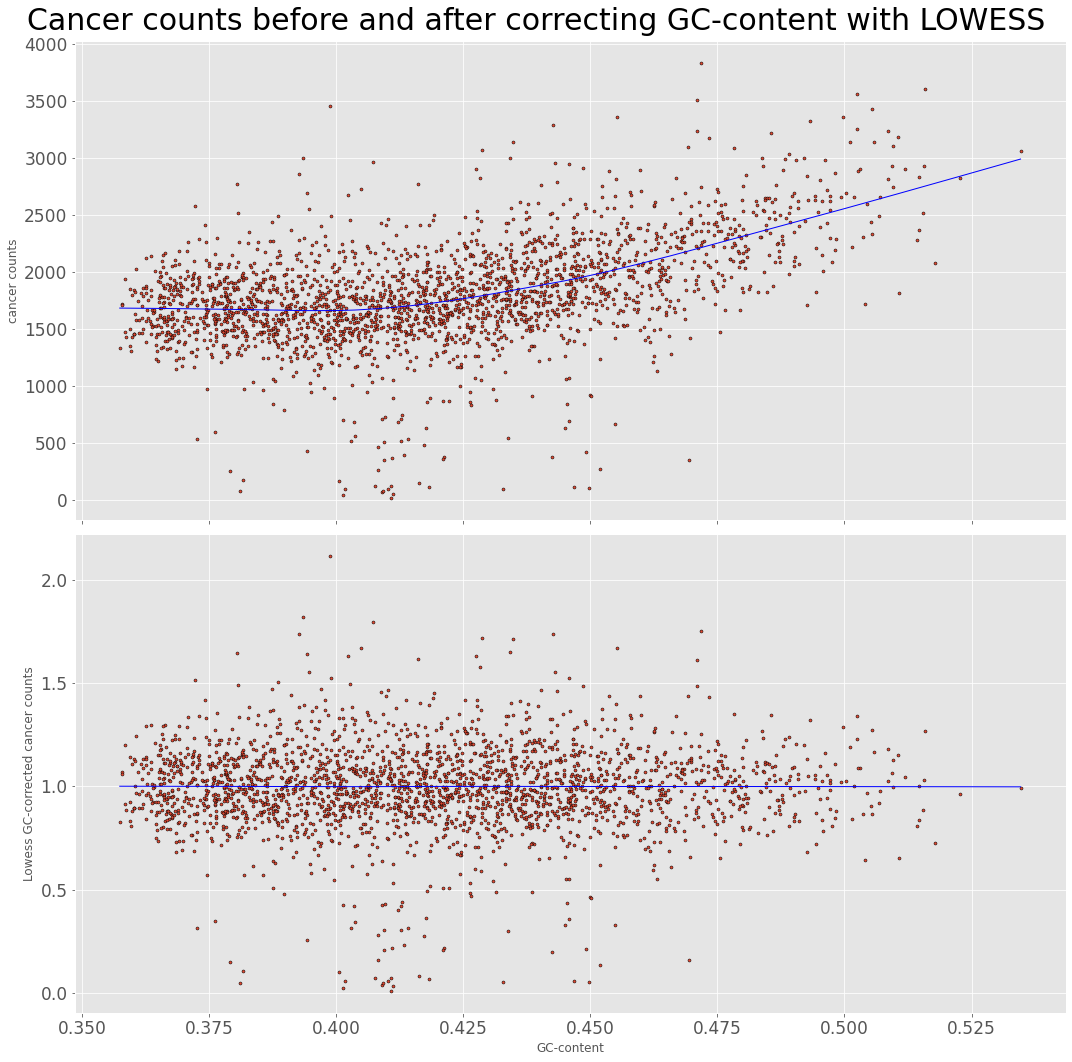

In [94]:
lowess_cancer = sm.nonparametric.lowess(copy_df['cancer_counts'],copy_df['GC_content'],frac=.5)
lowess_x_cancer = list(zip(*lowess_cancer))[0]
lowess_y_cancer = list(zip(*lowess_cancer))[1]

lowess_corrected_cancer = sm.nonparametric.lowess(copy_df['lowess_gc_corrected_cancer_counts'],copy_df['GC_content'],frac=.5)
lowess_corrected_x_cancer = list(zip(*lowess_corrected_cancer))[0]
lowess_corrcted_y_cancer = list(zip(*lowess_corrected_cancer))[1]

fig07,axs07= plt.subplots(2,sharex=True)
fig07.suptitle('Cancer counts before and after correcting GC-content with LOWESS')
axs07[0].scatter(copy_df['GC_content'], copy_df['cancer_counts'])
axs07[0].plot(lowess_x_cancer, lowess_y_cancer, '-b', linewidth = 1)
axs07[1].scatter(copy_df['GC_content'], copy_df['lowess_gc_corrected_cancer_counts'])#*(copy_df.cancer_counts.median()/2))   
axs07[1].plot(lowess_corrected_x_cancer,lowess_corrcted_y_cancer,'-b',linewidth=1)
axs07[0].set(ylabel='cancer counts')
axs07[1].set(xlabel='GC-content',ylabel='Lowess GC-corrected cancer counts')

plt.show()

In [95]:
copy_df['GC_corrected_and_control_normalised'] = copy_df['gc_normlised_cancer_counts']/copy_df['gc_normalised_normal_counts']

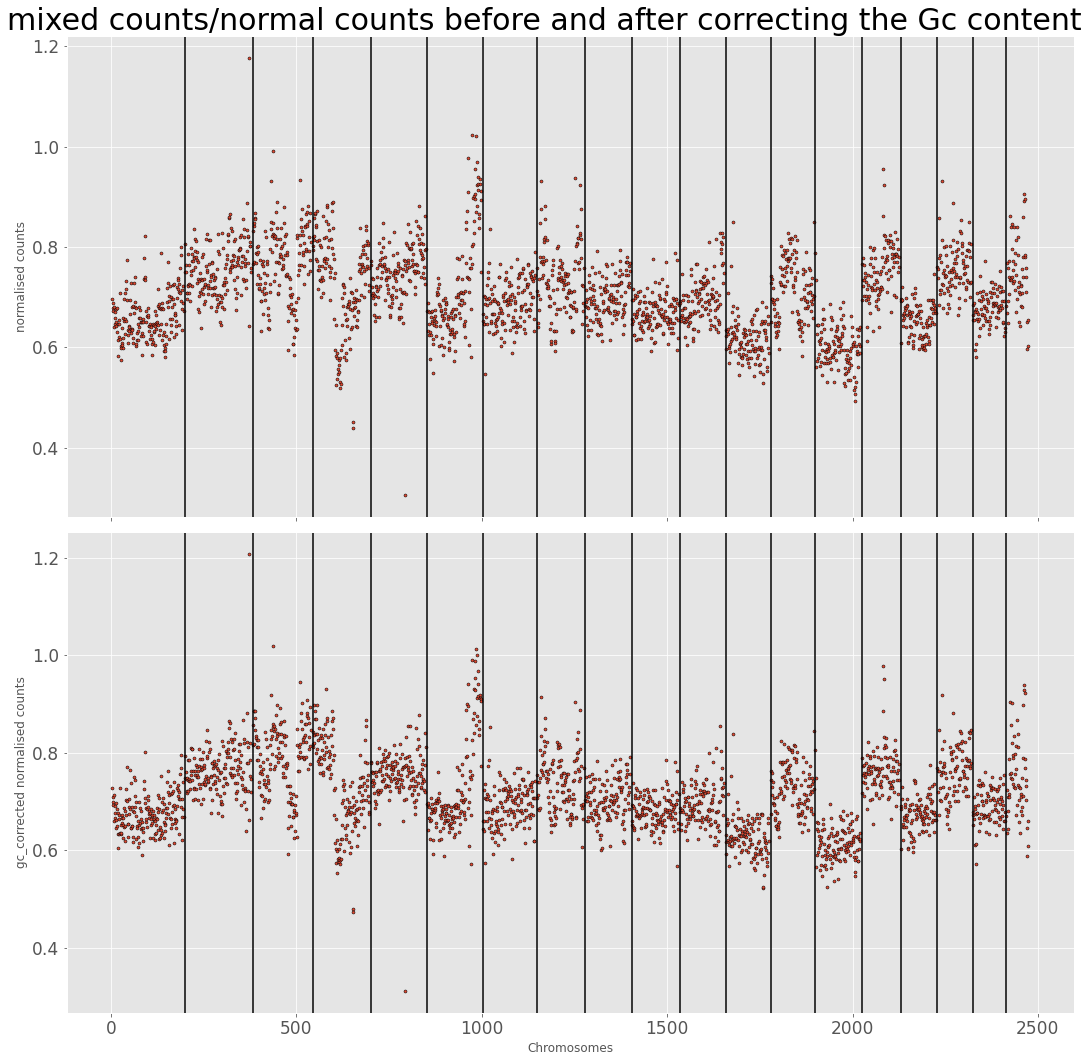

In [96]:
fig08, axs08 = plt.subplots(2,sharex=True)
fig08.suptitle('mixed counts/normal counts before and after correcting the Gc content')
axs08[0].scatter(copy_df['bin_ind'],copy_df['cancer_counts']/copy_df['normal_counts'])
axs08[1].scatter(copy_df['bin_ind'], copy_df['GC_corrected_and_control_normalised'])
axs08[0].set(ylabel='normalised counts')
axs08[1].set(ylabel='gc_corrected normalised counts')
indices = cnv.index_of_chr(copy_df,"chr_ind","bin_start")
del indices[-1:] 

for j in range(2):
    for i in indices:
        axs08[j].axvline(x=copy_df.bin_ind[i],ymin=0,ymax=1,c='black')
plt.xlabel('Chromosomes')
plt.show()

[]

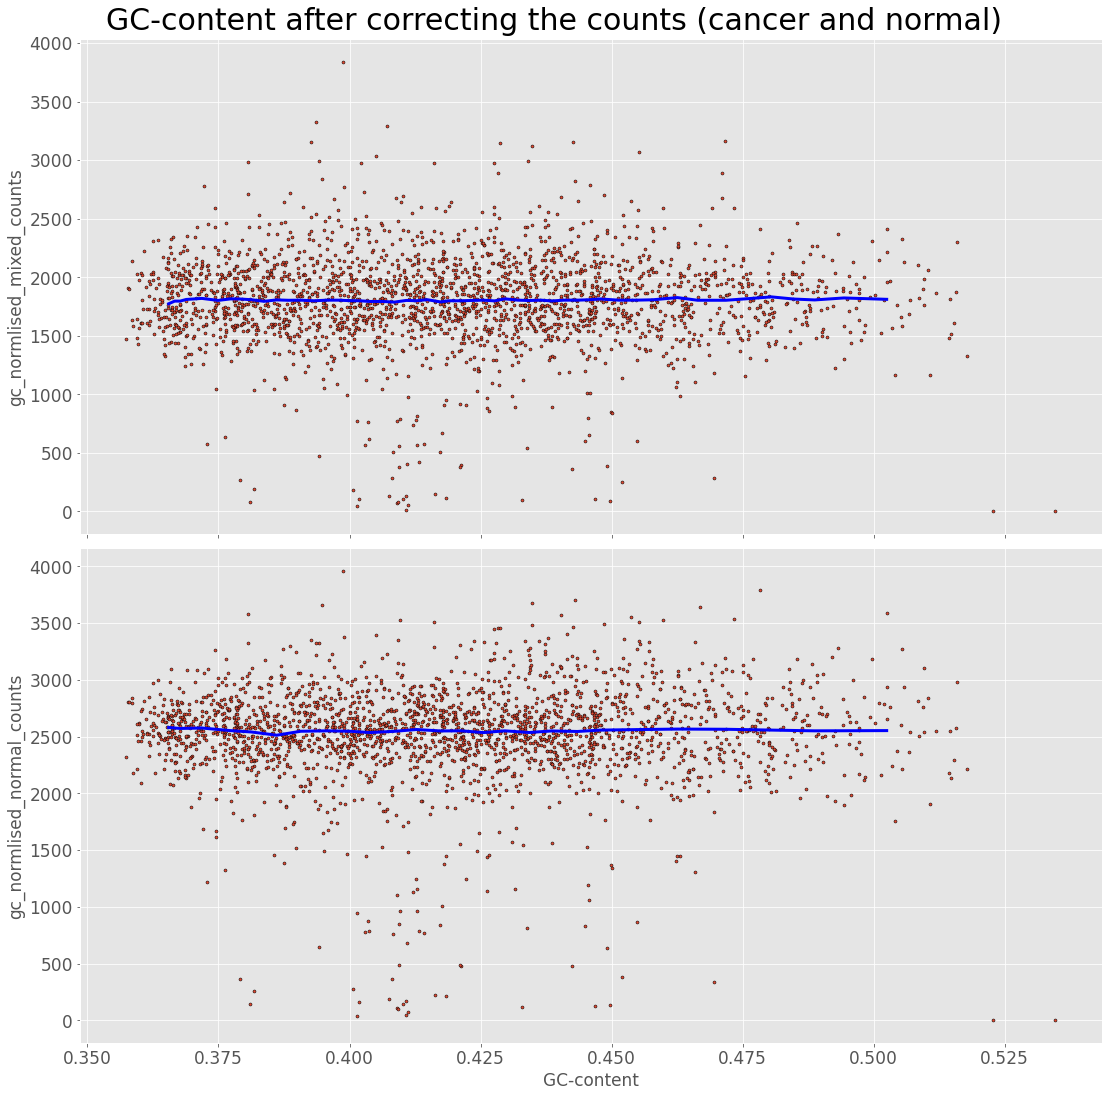

In [555]:
cancer_counts = []
gc_cancer = []
s  = copy_df.sort_values("GC_content",ignore_index=True)
for i in range (0,2550,50):
    cancer_counts.append(s.loc[(i-150):(i+150)].gc_normlised_cancer_counts.median())
    gc_cancer.append(s.loc[(i-150):(i+150)].GC_content.median())    
normal_counts = []
gc_normal = []
for i in range (0,2550,100):
    normal_counts.append(s.loc[(i-150):(i+150)].gc_normalised_normal_counts.median())
    gc_normal.append(s.loc[(i-150):(i+150)].GC_content.median())
fig09, axs09 = plt.subplots(2,sharex=True)
fig09.suptitle('GC-content after correcting the counts (cancer and normal)')
axs09[0].scatter(copy_df['GC_content'], copy_df['gc_normlised_cancer_counts'])
axs09[0].plot(gc_cancer, cancer_counts,color="b",linewidth=3.0)
axs09[1].scatter(copy_df['GC_content'], copy_df['gc_normalised_normal_counts'])
axs09[1].plot(gc_normal, normal_counts,color="b",linewidth=3.0)
axs09[0].set(ylabel='gc_normlised_mixed_counts')
axs09[1].set(xlabel='GC-content',ylabel='gc_normlised_normal_counts')

plt.plot()


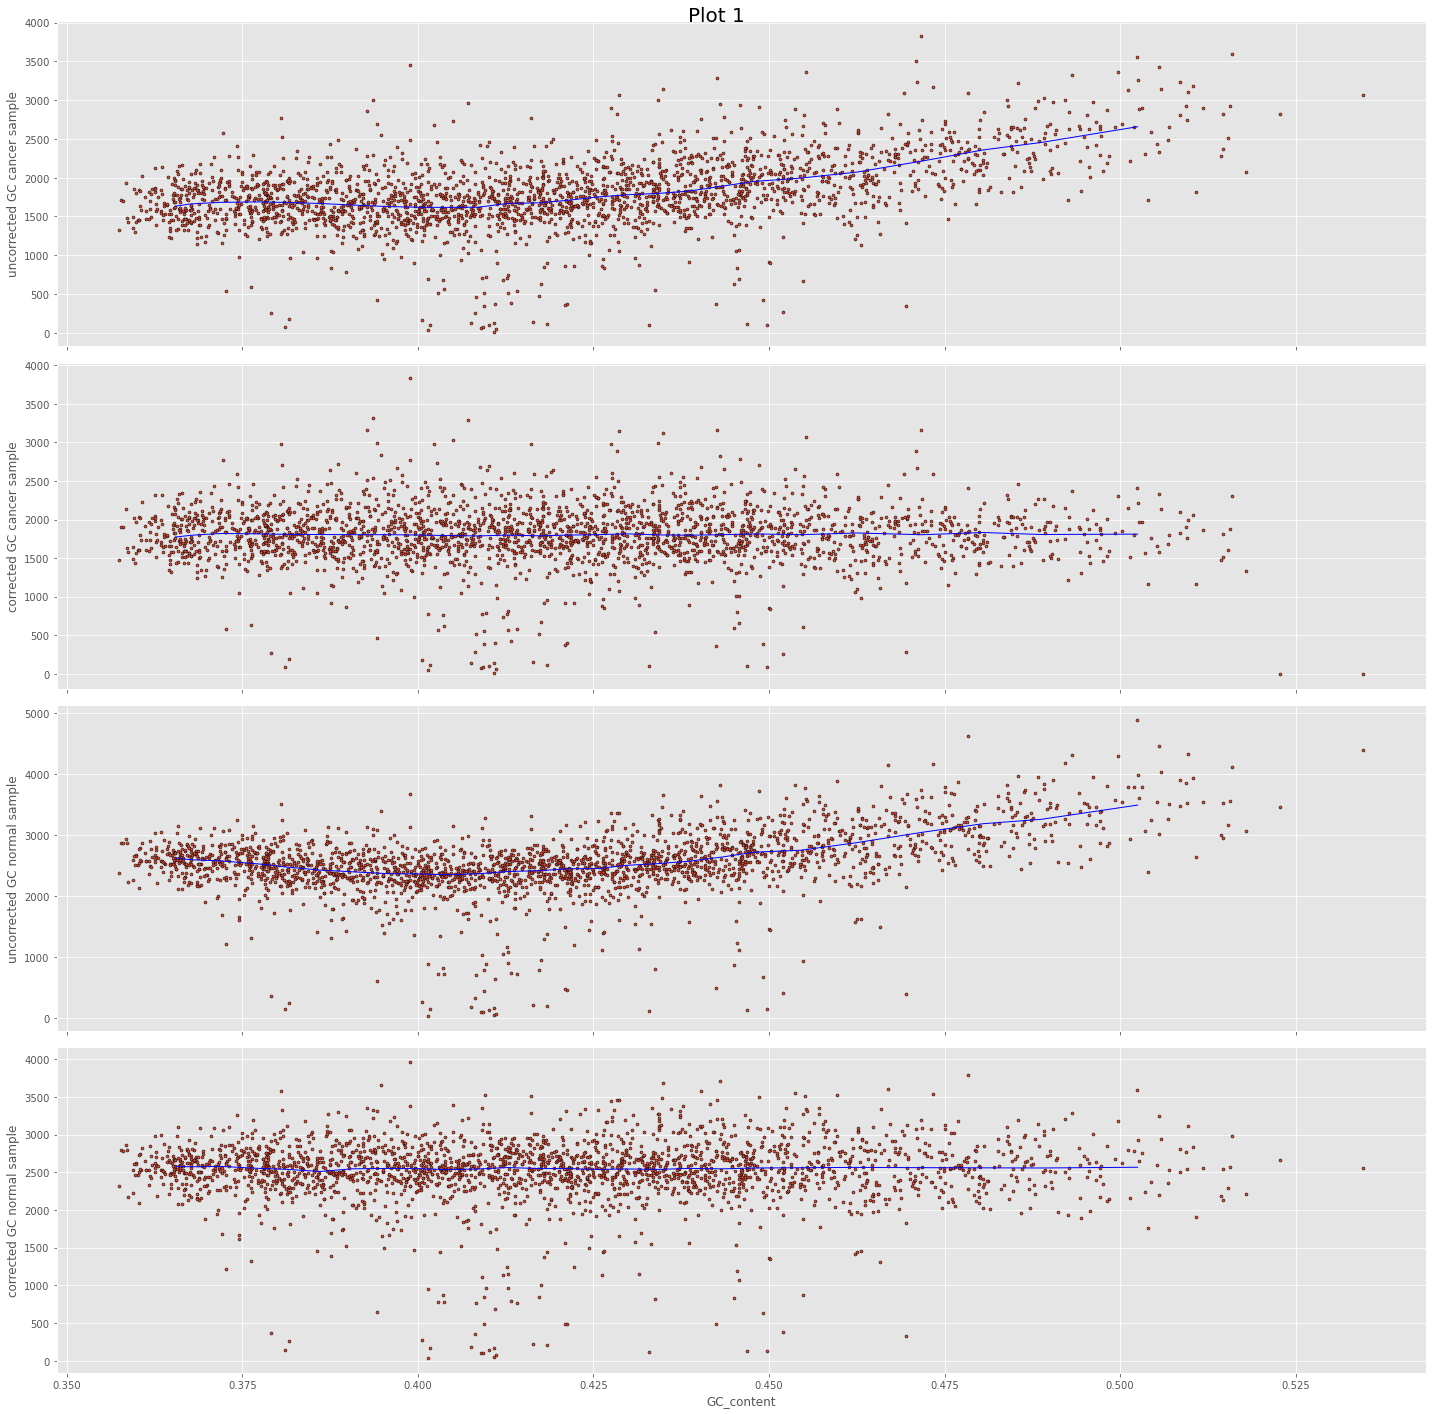

In [37]:
cancer_uncorrected_counts = []
cg_uncorrected_cancer = []
s =copy_df.sort_values("GC_content",ignore_index=True)
for i in range (0,2550,100):
    cancer_uncorrected_counts.append(s.loc[(i-150):(i+150)].cancer_counts.median())
    cg_uncorrected_cancer.append(s.loc[(i-150):(i+150)].GC_content.median())    
normal_uncorrected_counts = []
cg_uncorrected_normal = []
for i in range (0,2550,100):
    normal_uncorrected_counts.append(s.loc[(i-150):(i+150)].normal_counts.median())
    cg_uncorrected_normal.append(s.loc[(i-150):(i+150)].GC_content.median())
cancer_corrected_counts = []
cg_corrected_cancer = []
s  = copy_df.sort_values("GC_content",ignore_index=True)
for i in range (0,2550,100):
    cancer_corrected_counts.append(s.loc[(i-150):(i+150)].gc_normlised_cancer_counts.median())
    cg_corrected_cancer.append(s.loc[(i-150):(i+150)].GC_content.median())
normal_corrected_counts = []
cg_corrected_normal = []
for i in range (0,2550,100):
    normal_corrected_counts.append(s.loc[(i-150):(i+150)].gc_normalised_normal_counts.median())
    cg_corrected_normal.append(s.loc[(i-150):(i+150)].GC_content.median())
      
fig10,axs10= plt.subplots(4,sharex=True)
fig10.suptitle('Plot 1')
axs10[0].scatter(copy_df['GC_content'],copy_df['cancer_counts'])
axs10[0].plot(cg_uncorrected_cancer, cancer_uncorrected_counts,color="b",linewidth = 1.0)
axs10[2].scatter(copy_df['GC_content'],copy_df['normal_counts'])
axs10[2].plot(cg_uncorrected_normal, normal_uncorrected_counts,color="b",linewidth=1.0)
axs10[1].scatter(copy_df['GC_content'],copy_df['gc_normlised_cancer_counts'])
axs10[1].plot(cg_corrected_cancer, cancer_corrected_counts,color = "b",linewidth = 1.0)
axs10[3].scatter(copy_df['GC_content'],copy_df['gc_normalised_normal_counts'])
axs10[3].plot(cg_corrected_normal,normal_corrected_counts,color="b",linewidth=1.0)

axs10[0].set(ylabel='uncorrected GC cancer sample')
axs10[1].set(ylabel='corrected GC cancer sample')
axs10[2].set(ylabel='uncorrected GC normal sample')
axs10[3].set(xlabel='GC_content',ylabel='corrected GC normal sample')
plt.rcParams["figure.figsize"] = [20,20]
plt.show()

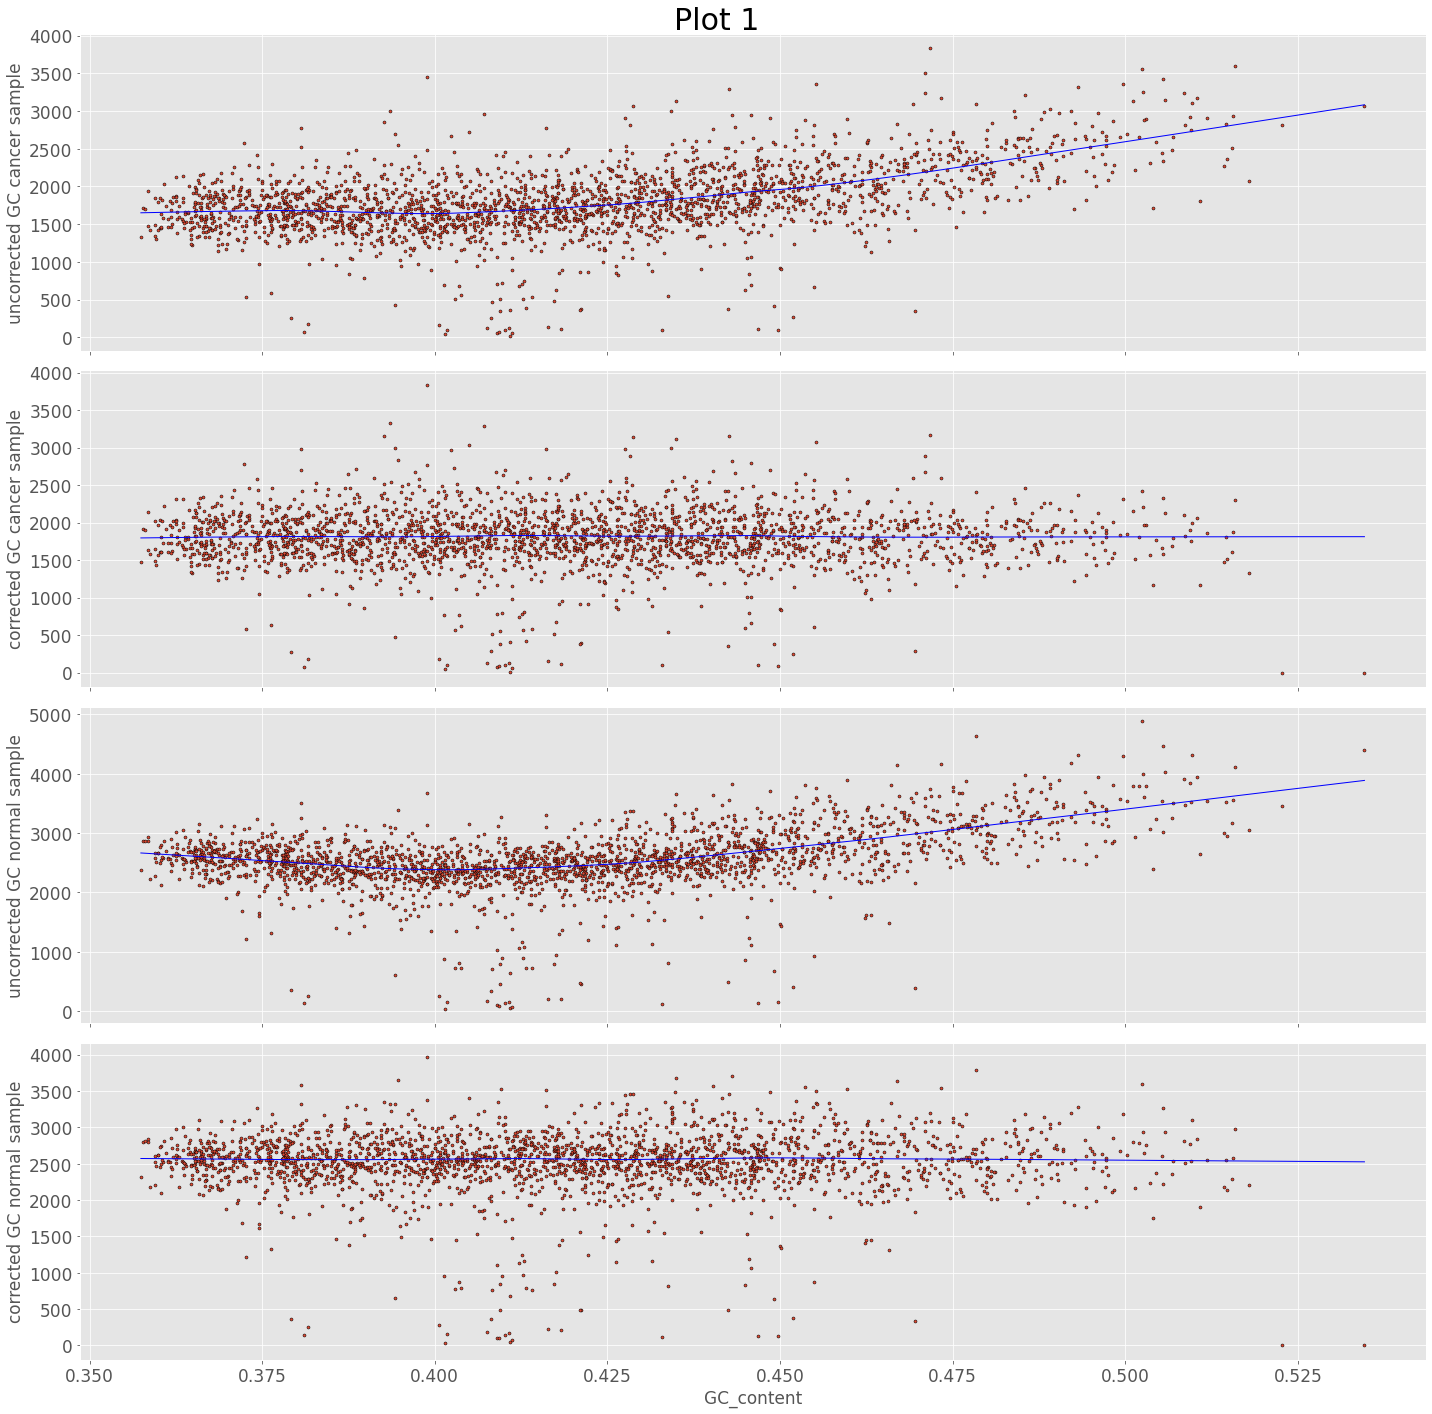

In [557]:
lowess_gc_cancer = sm.nonparametric.lowess(copy_df['gc_normlised_cancer_counts'],copy_df['GC_content'], frac=.3)
lowess_x_gc_cancer = list(zip(*lowess_gc_cancer))[0]
lowess_y_gc_cancer = list(zip(*lowess_gc_cancer))[1]

lowess_gc_normal = sm.nonparametric.lowess(copy_df['gc_normalised_normal_counts'],copy_df['GC_content'], frac=.3)
lowess_x_gc_normal = list(zip(*lowess_gc_normal))[0]
lowess_y_gc_normal = list(zip(*lowess_gc_normal))[1]

lowess_cancer = sm.nonparametric.lowess(copy_df['cancer_counts'],copy_df['GC_content'], frac=.3)
lowess_x_cancer = list(zip(*lowess_cancer))[0]
lowess_y_cancer = list(zip(*lowess_cancer))[1]

lowess_normal = sm.nonparametric.lowess(copy_df['normal_counts'],copy_df['GC_content'], frac=.3)
lowess_x_normal = list(zip(*lowess_normal))[0]
lowess_y_normal = list(zip(*lowess_normal))[1]

fig11,axs11=plt.subplots(4,sharex = True)
fig11.suptitle('Plot 1')

axs11[0].scatter(copy_df['GC_content'], copy_df['cancer_counts'])
axs11[0].plot(lowess_x_cancer, lowess_y_cancer, '-b', linewidth = 1)
axs11[2].scatter(copy_df['GC_content'],copy_df['normal_counts'])
axs11[2].plot(lowess_x_normal, lowess_y_normal, '-b', linewidth = 1)
axs11[1].scatter(copy_df['GC_content'], copy_df['gc_normlised_cancer_counts'])
axs11[1].plot(lowess_x_gc_cancer, lowess_y_gc_cancer, '-b', linewidth = 1)
axs11[3].scatter(copy_df['GC_content'], copy_df['gc_normalised_normal_counts'])
axs11[3].plot(lowess_x_gc_normal,lowess_y_gc_normal, '-b', linewidth = 1)

axs11[0].set(ylabel = 'uncorrected GC cancer sample')
axs11[1].set(ylabel = 'corrected GC cancer sample')
axs11[2].set(ylabel = 'uncorrected GC normal sample')
axs11[3].set(xlabel = 'GC_content', ylabel = 'corrected GC normal sample')

plt.rcParams["figure.figsize"] = [20, 20]

plt.show()


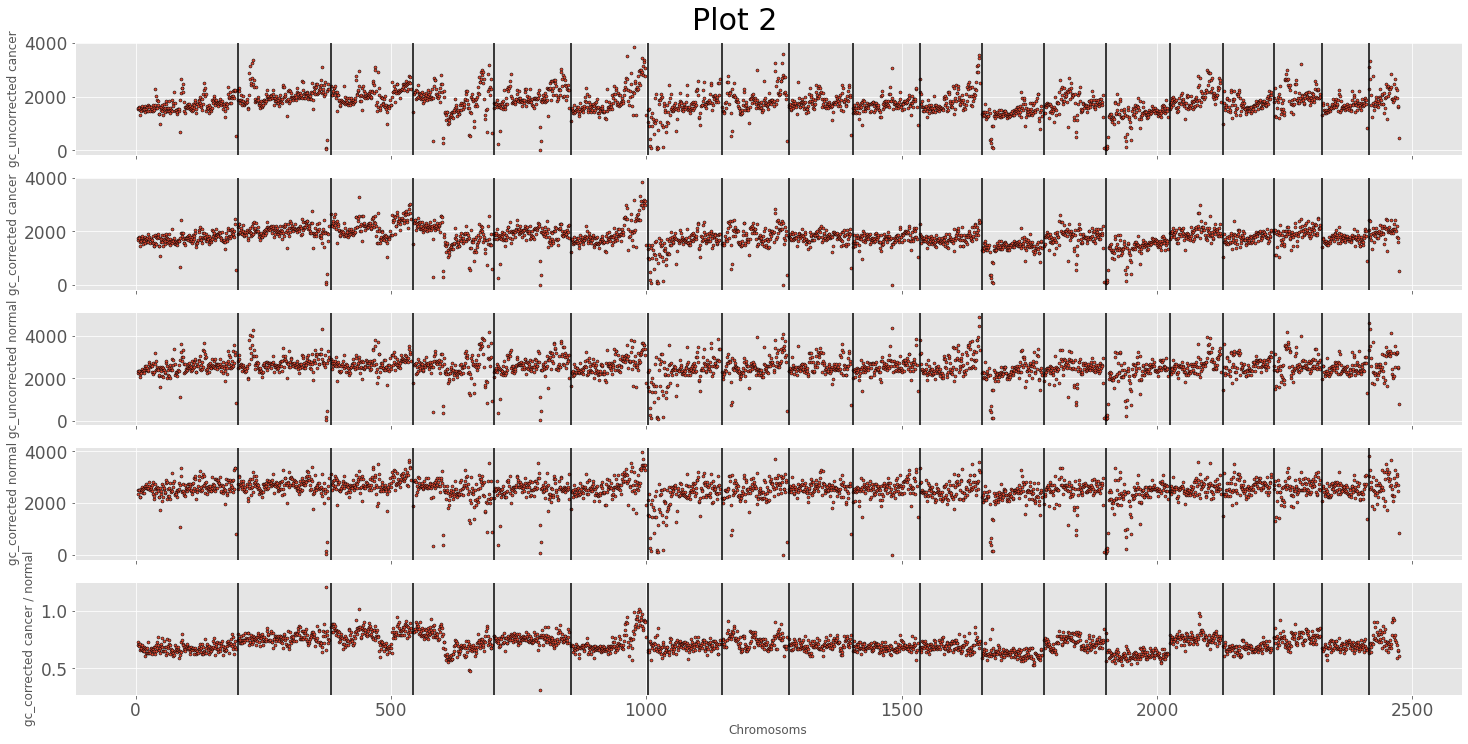

In [86]:
fig12, axs12 = plt.subplots(5,sharex=True)
fig12.suptitle('Plot 2')
axs12[0].scatter(copy_df['bin_ind'], copy_df['cancer_counts'])
axs12[1].scatter(copy_df['bin_ind'], copy_df['gc_normlised_cancer_counts'])
axs12[2].scatter(copy_df['bin_ind'], copy_df['normal_counts'])
axs12[3].scatter(copy_df['bin_ind'], copy_df['gc_normalised_normal_counts'])
axs12[4].scatter(copy_df['bin_ind'], (copy_df['gc_normlised_cancer_counts']/copy_df['gc_normalised_normal_counts']))   
indices = cnv.index_of_chr(copy_df,"chr_ind","bin_start")
del indices[-1:] 
for j in range(5):
    for i in indices:
        axs12[j].axvline(x=copy_df.bin_ind[i],ymin=0,ymax=1,c='black')
axs12[0].set(ylabel='gc_uncorrected cancer')
axs12[1].set(ylabel='gc_corrected cancer')
axs12[2].set(ylabel='gc_uncorrected normal')
axs12[3].set(ylabel='gc_corrected normal')
axs12[4].set(ylabel='gc_corrected cancer / normal')

plt.rcParams["figure.figsize"] = [20,20]
plt.xlabel('Chromosoms')
plt.show()

In [131]:
copy_df["GC_corrected_and_control_normalised_diploid"] = (copy_df['GC_corrected_and_control_normalised']*2)/copy_df['GC_corrected_and_control_normalised'].median()

In [132]:
copy_df["GC_corrected_and_control_normalised_median"] = copy_df.groupby('chr_ind').GC_corrected_and_control_normalised_diploid.transform('median')
copy_df["GC_corrected_and_control_normalised_median"] = copy_df["GC_corrected_and_control_normalised_median"].round(decimals = 0)                           

In [126]:
((((copy_df.GC_corrected_and_control_normalised_diploid-copy_df.GC_corrected_and_control_normalised_median)** 2).sum())/len(copy_df))** .5      

0.11872683493486122

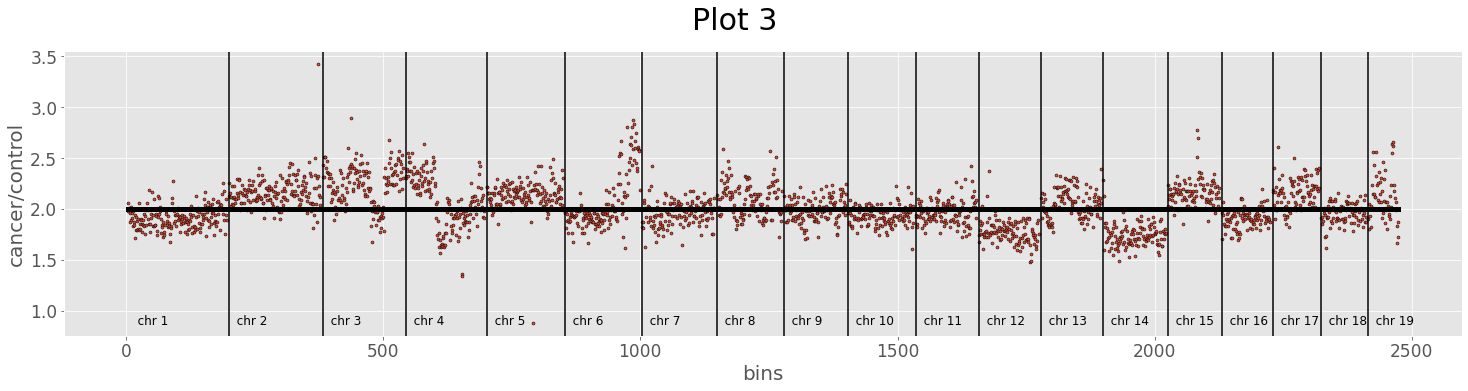

In [135]:
fig13, axs13 = plt.subplots()
axs13.scatter(copy_df['bin_ind'], copy_df['GC_corrected_and_control_normalised_diploid']) 
fig13.suptitle('Plot 3')
indices = cnv.index_of_chr(copy_df,"chr_ind","bin_start")
del indices[-1:]
plt.text(0, .9,'   chr 1',fontsize = 12,verticalalignment ='center') 
j = 2
for i in indices:
    axs13.axvline(x=copy_df.bin_ind[i],ymin=0,ymax=1,c='black')
    axs13.text(copy_df.bin_ind[i], .9, '  chr '+str(j),fontsize = 12,verticalalignment ='center') 
    j = j+1
copy_df[copy_df.chr_ind.isin(list(range(1,20)))].groupby('chr').plot(c ='black',legend= 0,y='GC_corrected_and_control_normalised_median', x='bin_ind', kind='line', ax=axs13,linewidth=5.0)   
plt.rcParams["figure.figsize"] = [20.50, 5.50]
plt.xlabel('bins',fontsize = 20)
plt.ylabel('cancer/control',fontsize = 20)
plt.show()